In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Objective

To help the marketing team increase customer opt-ins (to email subscription) - to making more purchases based on the below data

## Wrangling

In [2]:
df = pd.read_excel("Email Performance Analytics _Data.xlsx")
df.shape

(10000, 51)

In [3]:
data_dictionary = pd.read_excel("Email Performance Analytics _Data.xlsx", sheet_name=1)
data_dictionary

,Variable Name,Variable description
0,Midascontactid,Unique Id assigned to each contact or Email
1,Createdat,Account creation date
2,Emailpermissionstatus,Email permission when the data was pulled\nI-O...
3,Cont.Acq.Src,Customer acquired source independent of email ...
4,Email.Src.First,Customer acquired source when first received e...
5,Segment,Consumer segment
6,Segmentsecondary,Secondary consumer segment
7,Email.Acq.Dt,Customer Email acquired date
8,Email.Pref.Ch.Dt,Email preference change date
9,Entry.Point.List,Pipe delimited filed of all the sources that c...


In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Midascontactid,1020375449,1042778096,1039527195,1008356168,1038164470,1041467900,1044033221,1042279121,1042888581,1044821651
Createdat,2019-04-23 00:00:00,2019-10-16 00:00:00,2019-07-29 00:00:00,2019-11-29 00:00:00,2019-04-30 00:00:00,2019-09-06 00:00:00,2019-12-05 00:00:00,2019-09-27 00:00:00,2019-10-20 00:00:00,2019-12-22 00:00:00
Emailpermissionstatus,I,U,I,I,U,U,I,U,I,U
Cont.Acq.Src,LIDUAS16,OOBWIN15,NETMINNG,EPI2,OOBWIN15,OOBWIN15,CROWDS19,OOBWIN15,OOBWIN15,OOBWIN15
Email.Src.First,OOBWIN15,NaN,NETMINNG,EPI2,NaN,NaN,CROWDS19,NaN,OOBWIN15,NaN
Segment,CON,CON,CON,CON,CON,CON,CON,CON,CON,CON
Segmentsecondary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Email.Acq.Dt,2019-04-22 00:00:00,NaT,2019-07-29 00:00:00,2015-11-04 00:00:00,NaT,NaT,2019-12-04 00:00:00,NaT,2019-10-20 00:00:00,NaT
Email.Pref.Ch.Dt,2019-08-24 00:00:00,2019-10-15 00:00:00,2019-07-30 00:00:00,2019-11-29 00:00:00,2019-04-29 00:00:00,2019-09-05 00:00:00,2020-01-06 00:00:00,2019-09-26 00:00:00,2019-10-20 00:00:00,2019-12-21 00:00:00
Entry.Point.List,|LIDUAS1608|OOBAND1407|OOBWIN1506|,|OOBWIN1506|,|HYBRIS1506|IGNONE20121024|SAPCRMSHIP120501|,|HYBRIS1506|LENI2|OOBWIN1407|OOBWIN1506|RI6 PE...,|OOBWIN1506|,|OOBWIN1506|,|CROWDS1902|HYBORD1502|HYBRIS1506|SAPCRMSHIP12...,|OOBWIN1506|,|OOBWIN1506|,|OOBWIN1506|


In [5]:
df[df.isna()]

,Midascontactid,Createdat,Emailpermissionstatus,Cont.Acq.Src,Email.Src.First,Segment,Segmentsecondary,Email.Acq.Dt,Email.Pref.Ch.Dt,Entry.Point.List,...,Eml.Click.First.Ts,Eml.Click.Last.Ts,Eml.Bounce.Last.Ts,Eml.Unsub.Last.Ts,Eml.Spam.Last.Ts,Email.Domain,Em.Pref.Status,Em.Pref.Dte,Invalid.Email.Dte,Em.Spamclplt.Dte
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaT,NaT,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaT,NaT,NaN
2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaT,NaT,NaN
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaT,NaT,NaN
4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaT,NaT,NaN
9996,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaT,NaT,NaN
9997,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaT,NaT,NaN
9998,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaT,NaT,NaN


In [6]:
df.Createdat.isnull().sum()

0

In [7]:
new_df = df.copy()

#### for the purpose of creating a new target feature that will be the sum of all products bought

In [8]:
def boughtitems(x): 
    if "Prod.Buy." in x and x not in ("Prod.Buy.Last","Prod.Buy.First"):
        return True

#### Fixing Rare Labels

In [9]:
values_Email_src_first = ['OOBWIN15','HYBRIS15','CROWDS19','ADBEMA19','NETMINNG','OOBAND14'] 
values_Cont_acq_src = ['OOBWIN15','HYBRIS15','5.296288','ADBEMA19','NETMINNG','OOBAND14']
values_Email_domain = ['gmail.com','yahoo.com','outlook.com','hotmail.com','aol.com']

new_df['Email.Src.First'] = new_df['Email.Src.First'].apply(lambda x: x if x in values_Email_src_first else 'others')
new_df['Cont.Acq.Src'] = new_df['Cont.Acq.Src'].apply(lambda x: x if x in values_Cont_acq_src else 'others')
new_df['Email.Domain'] = new_df['Email.Domain'].apply(lambda x: x if x in values_Email_domain else 'others')

### Creating a list to consolidate all purchases into a new feature engineered target column + fixing other date columns in the manner explained in the next cell

In [10]:
col_bought_items = [cols for cols in df.columns if boughtitems(cols)]
other_cols = set(('Email.Acq.Dt','Eml.Sent.Last.Ts','Eml.Sent.First.Ts','Prod.Buy.Last','Prod.Buy.First',
              'Em.Pref.Dte','Createdat','Email.Acq.Dt','Eml.Sent.Last.Ts','Eml.Sent.First.Ts','Prod.Buy.Last',
             'Prod.Buy.First', 'Eml.Click.Last.Ts', 'Eml.Open.Last.Ts','Eml.Open.First.Ts', 'Email.Pref.Ch.Dt',
                  'Cont.Acq.Dte','Eml.Click.First.Ts','Eml.Bounce.Last.Ts','Eml.Unsub.Last.Ts','Eml.Spam.Last.Ts',
                 'Invalid.Email.Dte'))
other_cols = list(other_cols)
print(col_bought_items+other_cols)


['Prod.Buy.Accessories', 'Prod.Buy.All.In.One.Desktop', 'Prod.Buy.Desktop', 'Prod.Buy.Idc', 'Prod.Buy.Idpd', 'Prod.Buy.Laptop', 'Prod.Buy.Servers', 'Prod.Buy.Software', 'Prod.Buy.Thnkc', 'Prod.Buy.Thnkp', 'Prod.Buy.Warranties', 'Prod.Buy.Workstation', 'Prod.Buy.Android.Tablet', 'Prod.Buy.Windows.Tablet', 'Prod.Buy.Convertible', 'Prod.Buy.Android.Os', 'Prod.Buy.Gaming', 'Prod.Buy.Windows.Os', 'Prod.Buy.Gaming.Related', 'Invalid.Email.Dte', 'Eml.Click.Last.Ts', 'Eml.Click.First.Ts', 'Createdat', 'Eml.Sent.First.Ts', 'Eml.Unsub.Last.Ts', 'Eml.Bounce.Last.Ts', 'Prod.Buy.First', 'Em.Pref.Dte', 'Eml.Open.Last.Ts', 'Eml.Open.First.Ts', 'Prod.Buy.Last', 'Email.Acq.Dt', 'Eml.Spam.Last.Ts', 'Cont.Acq.Dte', 'Eml.Sent.Last.Ts', 'Email.Pref.Ch.Dt']


### Below - an example of a typical data column

In [11]:
new_df['Eml.Click.Last.Ts']

0      2019-08-21
1             NaT
2             NaT
3      2016-08-06
4      2019-05-26
          ...    
9995          NaT
9996          NaT
9997          NaT
9998   2020-01-10
9999          NaT
Name: Eml.Click.Last.Ts, Length: 10000, dtype: datetime64[ns]

# Help Needed Below

### Since many dates are missing, and the dates follow any particular sequence, I created a new column per column with missing dates - gave it a binary value (0 if missing, 1 if not), and removed the original column.

### Is there a better strategy to manage these kind of missing dates?

In [12]:
for i, col in enumerate(col_bought_items+other_cols):
    new_df[col+'_'] = new_df[col].apply(lambda x: 0 if str(x) == 'NaT' else 1)
    new_df.drop([col], axis=1, inplace=True)
    print("{} name is now {}".format(col,col+str(i)))
    
    

Prod.Buy.Accessories name is now Prod.Buy.Accessories0
Prod.Buy.All.In.One.Desktop name is now Prod.Buy.All.In.One.Desktop1
Prod.Buy.Desktop name is now Prod.Buy.Desktop2
Prod.Buy.Idc name is now Prod.Buy.Idc3
Prod.Buy.Idpd name is now Prod.Buy.Idpd4
Prod.Buy.Laptop name is now Prod.Buy.Laptop5
Prod.Buy.Servers name is now Prod.Buy.Servers6
Prod.Buy.Software name is now Prod.Buy.Software7
Prod.Buy.Thnkc name is now Prod.Buy.Thnkc8
Prod.Buy.Thnkp name is now Prod.Buy.Thnkp9
Prod.Buy.Warranties name is now Prod.Buy.Warranties10
Prod.Buy.Workstation name is now Prod.Buy.Workstation11
Prod.Buy.Android.Tablet name is now Prod.Buy.Android.Tablet12
Prod.Buy.Windows.Tablet name is now Prod.Buy.Windows.Tablet13
Prod.Buy.Convertible name is now Prod.Buy.Convertible14
Prod.Buy.Android.Os name is now Prod.Buy.Android.Os15
Prod.Buy.Gaming name is now Prod.Buy.Gaming16
Prod.Buy.Windows.Os name is now Prod.Buy.Windows.Os17
Prod.Buy.Gaming.Related name is now Prod.Buy.Gaming.Related18
Invalid.Email.Dt

In [13]:
new_df.columns

Index(['Midascontactid', 'Emailpermissionstatus', 'Cont.Acq.Src',
       'Email.Src.First', 'Segment', 'Segmentsecondary', 'Entry.Point.List',
       'Cont.Acq.Src2', 'Country', 'Eml.Sent.Num', 'Eml.Open.Num',
       'Eml.Click.Num', 'Email.Domain', 'Em.Pref.Status', 'Em.Spamclplt.Dte',
       'Prod.Buy.Accessories_', 'Prod.Buy.All.In.One.Desktop_',
       'Prod.Buy.Desktop_', 'Prod.Buy.Idc_', 'Prod.Buy.Idpd_',
       'Prod.Buy.Laptop_', 'Prod.Buy.Servers_', 'Prod.Buy.Software_',
       'Prod.Buy.Thnkc_', 'Prod.Buy.Thnkp_', 'Prod.Buy.Warranties_',
       'Prod.Buy.Workstation_', 'Prod.Buy.Android.Tablet_',
       'Prod.Buy.Windows.Tablet_', 'Prod.Buy.Convertible_',
       'Prod.Buy.Android.Os_', 'Prod.Buy.Gaming_', 'Prod.Buy.Windows.Os_',
       'Prod.Buy.Gaming.Related_', 'Invalid.Email.Dte_', 'Eml.Click.Last.Ts_',
       'Eml.Click.First.Ts_', 'Createdat_', 'Eml.Sent.First.Ts_',
       'Eml.Unsub.Last.Ts_', 'Eml.Bounce.Last.Ts_', 'Prod.Buy.First_',
       'Em.Pref.Dte_', 'Eml.Open.La

In [14]:
#new_df.drop(other_cols, axis=1, inplace=True)
try:
    new_df.drop(['Email.Acq.Dt','Eml.Sent.Last.Ts','Eml.Sent.First.Ts','Prod.Buy.Last','Prod.Buy.First',
              'Em.Pref.Dte','Createdat','Email.Acq.Dt','Eml.Sent.Last.Ts','Eml.Sent.First.Ts','Prod.Buy.Last',
             'Prod.Buy.First', 'Eml.Click.Last.Ts', 'Eml.Open.Last.Ts','Eml.Open.First.Ts', 'Email.Pref.Ch.Dt',
                  'Cont.Acq.Dte','Eml.Click.First.Ts','Eml.Bounce.Last.Ts','Eml.Unsub.Last.Ts','Eml.Spam.Last.Ts',
                 'Invalid.Email.Dte'], axis=1, inplace=True)
except:
    print("Exception")

Exception


In [15]:
new_df.columns

Index(['Midascontactid', 'Emailpermissionstatus', 'Cont.Acq.Src',
       'Email.Src.First', 'Segment', 'Segmentsecondary', 'Entry.Point.List',
       'Cont.Acq.Src2', 'Country', 'Eml.Sent.Num', 'Eml.Open.Num',
       'Eml.Click.Num', 'Email.Domain', 'Em.Pref.Status', 'Em.Spamclplt.Dte',
       'Prod.Buy.Accessories_', 'Prod.Buy.All.In.One.Desktop_',
       'Prod.Buy.Desktop_', 'Prod.Buy.Idc_', 'Prod.Buy.Idpd_',
       'Prod.Buy.Laptop_', 'Prod.Buy.Servers_', 'Prod.Buy.Software_',
       'Prod.Buy.Thnkc_', 'Prod.Buy.Thnkp_', 'Prod.Buy.Warranties_',
       'Prod.Buy.Workstation_', 'Prod.Buy.Android.Tablet_',
       'Prod.Buy.Windows.Tablet_', 'Prod.Buy.Convertible_',
       'Prod.Buy.Android.Os_', 'Prod.Buy.Gaming_', 'Prod.Buy.Windows.Os_',
       'Prod.Buy.Gaming.Related_', 'Invalid.Email.Dte_', 'Eml.Click.Last.Ts_',
       'Eml.Click.First.Ts_', 'Createdat_', 'Eml.Sent.First.Ts_',
       'Eml.Unsub.Last.Ts_', 'Eml.Bounce.Last.Ts_', 'Prod.Buy.First_',
       'Em.Pref.Dte_', 'Eml.Open.La

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Midascontactid                10000 non-null  int64  
 1   Emailpermissionstatus         10000 non-null  object 
 2   Cont.Acq.Src                  10000 non-null  object 
 3   Email.Src.First               10000 non-null  object 
 4   Segment                       10000 non-null  object 
 5   Segmentsecondary              87 non-null     object 
 6   Entry.Point.List              9943 non-null   object 
 7   Cont.Acq.Src2                 9943 non-null   object 
 8   Country                       10000 non-null  object 
 9   Eml.Sent.Num                  9859 non-null   float64
 10  Eml.Open.Num                  9859 non-null   float64
 11  Eml.Click.Num                 9859 non-null   float64
 12  Email.Domain                  10000 non-null  object 
 13  Em

### This is the new target column i.e. a summation of all purchases into one column

In [17]:
new_df['totalitems'] = new_df.loc[:,'Prod.Buy.Accessories_':'Prod.Buy.Gaming.Related_'].sum(axis=1)

In [18]:
new_df['totalitems']

0       3
1       2
2       2
3       3
4       3
       ..
9995    3
9996    2
9997    1
9998    2
9999    1
Name: totalitems, Length: 10000, dtype: int64

In [19]:
new_df.drop(['Prod.Buy.Accessories_', 'Prod.Buy.All.In.One.Desktop_',
       'Prod.Buy.Desktop_', 'Prod.Buy.Idc_', 'Prod.Buy.Idpd_',
       'Prod.Buy.Laptop_', 'Prod.Buy.Servers_', 'Prod.Buy.Software_',
       'Prod.Buy.Thnkc_', 'Prod.Buy.Thnkp_', 'Prod.Buy.Warranties_',
       'Prod.Buy.Workstation_', 'Prod.Buy.Android.Tablet_',
       'Prod.Buy.Windows.Tablet_', 'Prod.Buy.Convertible_',
       'Prod.Buy.Android.Os_', 'Prod.Buy.Gaming_', 'Prod.Buy.Windows.Os_',
       'Prod.Buy.Gaming.Related_'],axis=1,inplace=True)

In [20]:
new_df.columns

Index(['Midascontactid', 'Emailpermissionstatus', 'Cont.Acq.Src',
       'Email.Src.First', 'Segment', 'Segmentsecondary', 'Entry.Point.List',
       'Cont.Acq.Src2', 'Country', 'Eml.Sent.Num', 'Eml.Open.Num',
       'Eml.Click.Num', 'Email.Domain', 'Em.Pref.Status', 'Em.Spamclplt.Dte',
       'Invalid.Email.Dte_', 'Eml.Click.Last.Ts_', 'Eml.Click.First.Ts_',
       'Createdat_', 'Eml.Sent.First.Ts_', 'Eml.Unsub.Last.Ts_',
       'Eml.Bounce.Last.Ts_', 'Prod.Buy.First_', 'Em.Pref.Dte_',
       'Eml.Open.Last.Ts_', 'Eml.Open.First.Ts_', 'Prod.Buy.Last_',
       'Email.Acq.Dt_', 'Eml.Spam.Last.Ts_', 'Cont.Acq.Dte_',
       'Eml.Sent.Last.Ts_', 'Email.Pref.Ch.Dt_', 'totalitems'],
      dtype='object')

In [21]:
(new_df.isnull().sum() / len(df))*100

Midascontactid             0.00
Emailpermissionstatus      0.00
Cont.Acq.Src               0.00
Email.Src.First            0.00
Segment                    0.00
Segmentsecondary          99.13
Entry.Point.List           0.57
Cont.Acq.Src2              0.57
Country                    0.00
Eml.Sent.Num               1.41
Eml.Open.Num               1.41
Eml.Click.Num              1.41
Email.Domain               0.00
Em.Pref.Status             0.00
Em.Spamclplt.Dte         100.00
Invalid.Email.Dte_         0.00
Eml.Click.Last.Ts_         0.00
Eml.Click.First.Ts_        0.00
Createdat_                 0.00
Eml.Sent.First.Ts_         0.00
Eml.Unsub.Last.Ts_         0.00
Eml.Bounce.Last.Ts_        0.00
Prod.Buy.First_            0.00
Em.Pref.Dte_               0.00
Eml.Open.Last.Ts_          0.00
Eml.Open.First.Ts_         0.00
Prod.Buy.Last_             0.00
Email.Acq.Dt_              0.00
Eml.Spam.Last.Ts_          0.00
Cont.Acq.Dte_              0.00
Eml.Sent.Last.Ts_          0.00
Email.Pr

## The top 3 columns below are required to be dropped. Untreatable missing values. Eml.Click.First.Ts can also be dropped, but we choose to transform into a binary value.

In [22]:
new_df.isnull().sum().sort_values(ascending=False).head(10)

Em.Spamclplt.Dte         10000
Segmentsecondary          9913
Eml.Sent.Num               141
Eml.Open.Num               141
Eml.Click.Num              141
Entry.Point.List            57
Cont.Acq.Src2               57
totalitems                   0
Invalid.Email.Dte_           0
Emailpermissionstatus        0
dtype: int64

In [23]:
new_df.drop(['Em.Spamclplt.Dte','Segmentsecondary','Email.Src.First','Cont.Acq.Src2'], axis=1, inplace=True)

In [24]:
new_df.isnull().sum().sort_values(ascending=False).head(10)

Eml.Sent.Num             141
Eml.Open.Num             141
Eml.Click.Num            141
Entry.Point.List          57
totalitems                 0
Eml.Click.First.Ts_        0
Emailpermissionstatus      0
Cont.Acq.Src               0
Segment                    0
Country                    0
dtype: int64

In [25]:
new_df.shape

(10000, 29)

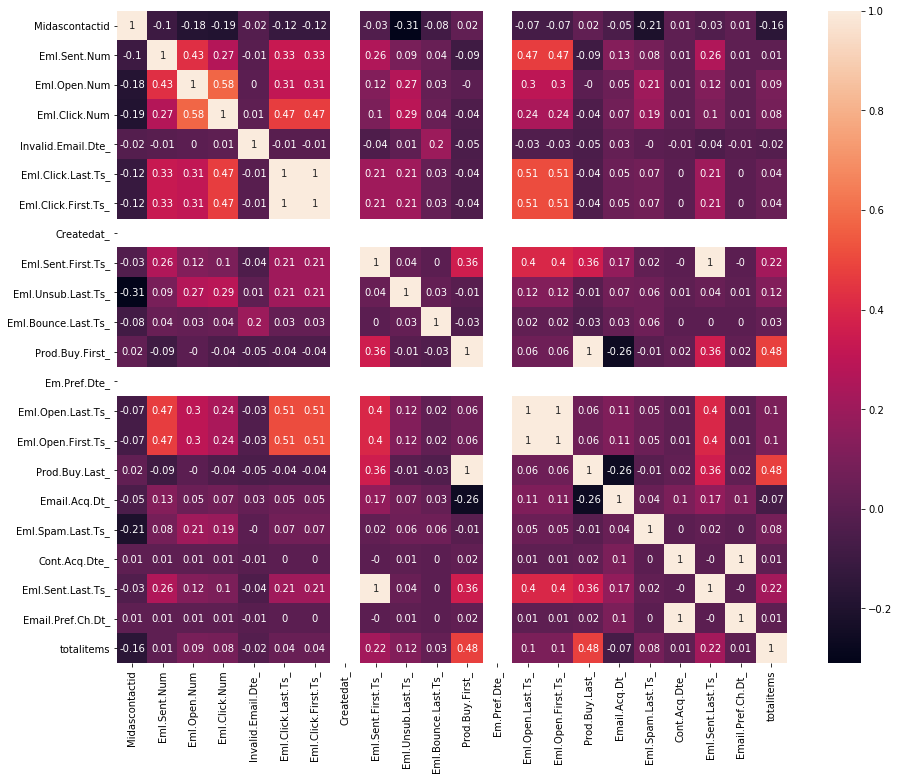

In [26]:
plt.figure(figsize=(15,12))
sns.heatmap(round(new_df.corr(),2),annot=True)

### The following columns show high collinearity with the target column

In [27]:
new_df.corr()['totalitems'].sort_values(ascending=False)

totalitems             1.000000
Prod.Buy.Last_         0.484802
Prod.Buy.First_        0.484802
Eml.Sent.Last.Ts_      0.221651
Eml.Sent.First.Ts_     0.221651
Eml.Unsub.Last.Ts_     0.115420
Eml.Open.First.Ts_     0.103648
Eml.Open.Last.Ts_      0.103648
Eml.Open.Num           0.086922
Eml.Click.Num          0.080374
Eml.Spam.Last.Ts_      0.077025
Eml.Click.First.Ts_    0.041225
Eml.Click.Last.Ts_     0.041225
Eml.Bounce.Last.Ts_    0.028762
Email.Pref.Ch.Dt_      0.008001
Cont.Acq.Dte_          0.008001
Eml.Sent.Num           0.007545
Invalid.Email.Dte_    -0.020347
Email.Acq.Dt_         -0.070897
Midascontactid        -0.158200
Createdat_                  NaN
Em.Pref.Dte_                NaN
Name: totalitems, dtype: float64

#### From the above, it seems to me that customers who have been first sent an email have a moderate to mild correlation with conversion. Also, Prod.Buy.Last is difficult to interpret as it can be that customers on whom data is available (i.e. who are in contact with the company) are likely to buy more - but it can also mean redundancy as that column can be highly collinear with target column - in which case this score of 0.48 is misleading.



In [28]:
new_df['Em.Pref.Dte_'].value_counts(), new_df['Createdat_'].value_counts()

(1    10000
 Name: Em.Pref.Dte_, dtype: int64,
 1    10000
 Name: Createdat_, dtype: int64)

In [29]:
new_df.drop(['Em.Pref.Dte_','Createdat_','Entry.Point.List','Midascontactid'],axis=1,inplace=True)

In [30]:
new_df.isnull().sum().sort_values(ascending=False).head(6)

Eml.Sent.Num           141
Eml.Open.Num           141
Eml.Click.Num          141
totalitems               0
Eml.Click.First.Ts_      0
Cont.Acq.Src             0
dtype: int64

In [31]:
((new_df['Eml.Sent.Num'].value_counts(dropna=False) / len(new_df))*100).head(10)

0.0    19.80
2.0    13.12
3.0     9.28
1.0     9.19
4.0     7.03
5.0     3.65
7.0     2.44
6.0     1.80
8.0     1.63
NaN     1.41
Name: Eml.Sent.Num, dtype: float64

In [32]:
new_df.isnull().sum().sort_values(ascending=False)

Eml.Sent.Num             141
Eml.Open.Num             141
Eml.Click.Num            141
totalitems                 0
Eml.Click.First.Ts_        0
Cont.Acq.Src               0
Segment                    0
Country                    0
Email.Domain               0
Em.Pref.Status             0
Invalid.Email.Dte_         0
Eml.Click.Last.Ts_         0
Eml.Sent.First.Ts_         0
Email.Pref.Ch.Dt_          0
Eml.Unsub.Last.Ts_         0
Eml.Bounce.Last.Ts_        0
Prod.Buy.First_            0
Eml.Open.Last.Ts_          0
Eml.Open.First.Ts_         0
Prod.Buy.Last_             0
Email.Acq.Dt_              0
Eml.Spam.Last.Ts_          0
Cont.Acq.Dte_              0
Eml.Sent.Last.Ts_          0
Emailpermissionstatus      0
dtype: int64

In [33]:
new_df.isnull().sum().sort_values(ascending=False)

Eml.Sent.Num             141
Eml.Open.Num             141
Eml.Click.Num            141
totalitems                 0
Eml.Click.First.Ts_        0
Cont.Acq.Src               0
Segment                    0
Country                    0
Email.Domain               0
Em.Pref.Status             0
Invalid.Email.Dte_         0
Eml.Click.Last.Ts_         0
Eml.Sent.First.Ts_         0
Email.Pref.Ch.Dt_          0
Eml.Unsub.Last.Ts_         0
Eml.Bounce.Last.Ts_        0
Prod.Buy.First_            0
Eml.Open.Last.Ts_          0
Eml.Open.First.Ts_         0
Prod.Buy.Last_             0
Email.Acq.Dt_              0
Eml.Spam.Last.Ts_          0
Cont.Acq.Dte_              0
Eml.Sent.Last.Ts_          0
Emailpermissionstatus      0
dtype: int64

## Check distribution for the below three independant features before imputation

In [34]:
import seaborn as sns

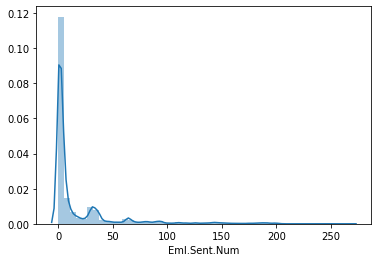

In [35]:
sns.distplot(new_df['Eml.Sent.Num'])

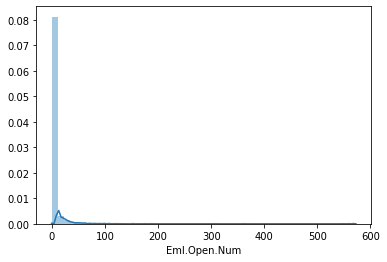

In [36]:
sns.distplot(new_df['Eml.Open.Num'])

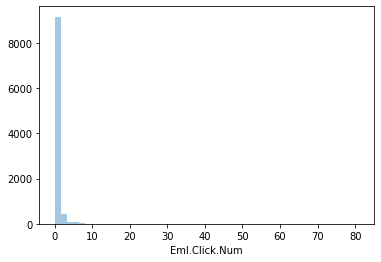

In [37]:
sns.distplot(new_df['Eml.Click.Num'],kde=False)

## Since these are massively skewed distributions, mean imputation is out of question. While value impution is possible, we have decided to drop these rows as they are a small subset of the dataset

In [38]:
modified_df = new_df.dropna()

In [39]:
modified_df.head()

,Emailpermissionstatus,Cont.Acq.Src,Segment,Country,Eml.Sent.Num,Eml.Open.Num,Eml.Click.Num,Email.Domain,Em.Pref.Status,Invalid.Email.Dte_,...,Prod.Buy.First_,Eml.Open.Last.Ts_,Eml.Open.First.Ts_,Prod.Buy.Last_,Email.Acq.Dt_,Eml.Spam.Last.Ts_,Cont.Acq.Dte_,Eml.Sent.Last.Ts_,Email.Pref.Ch.Dt_,totalitems
0,I,others,CON,US,228.0,41.0,1.0,gmail.com,I,0,...,1,1,1,1,1,0,1,1,1,3
1,U,OOBWIN15,CON,US,2.0,0.0,0.0,hotmail.com,U,0,...,1,0,0,1,0,0,1,1,1,2
2,I,NETMINNG,CON,US,121.0,4.0,0.0,hotmail.com,I,0,...,1,1,1,1,1,0,1,1,1,2
3,I,others,CON,US,15.0,2.0,2.0,gmail.com,I,0,...,1,1,1,1,1,0,1,1,1,3
4,U,OOBWIN15,CON,US,20.0,1.0,1.0,hotmail.com,U,0,...,1,1,1,1,0,0,1,1,1,3


In [40]:
cleaned_data = pd.get_dummies(modified_df)

In [41]:
cleaned_data.head()

,Eml.Sent.Num,Eml.Open.Num,Eml.Click.Num,Invalid.Email.Dte_,Eml.Click.Last.Ts_,Eml.Click.First.Ts_,Eml.Sent.First.Ts_,Eml.Unsub.Last.Ts_,Eml.Bounce.Last.Ts_,Prod.Buy.First_,...,Country_us,Email.Domain_aol.com,Email.Domain_gmail.com,Email.Domain_hotmail.com,Email.Domain_others,Email.Domain_outlook.com,Email.Domain_yahoo.com,Em.Pref.Status_I,Em.Pref.Status_O,Em.Pref.Status_U
0,228.0,41.0,1.0,0,1,1,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,2.0,0.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,121.0,4.0,0.0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,15.0,2.0,2.0,0,1,1,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,20.0,1.0,1.0,0,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [42]:
cleaned_data.isnull().sum().sort_values(ascending=False)

Em.Pref.Status_U            0
Cont.Acq.Src_HYBRIS15       0
Emailpermissionstatus_U     0
Emailpermissionstatus_O     0
Emailpermissionstatus_I     0
totalitems                  0
Email.Pref.Ch.Dt_           0
Eml.Sent.Last.Ts_           0
Cont.Acq.Dte_               0
Eml.Spam.Last.Ts_           0
Email.Acq.Dt_               0
Prod.Buy.Last_              0
Eml.Open.First.Ts_          0
Eml.Open.Last.Ts_           0
Prod.Buy.First_             0
Eml.Bounce.Last.Ts_         0
Eml.Unsub.Last.Ts_          0
Eml.Sent.First.Ts_          0
Eml.Click.First.Ts_         0
Eml.Click.Last.Ts_          0
Invalid.Email.Dte_          0
Eml.Click.Num               0
Eml.Open.Num                0
Cont.Acq.Src_ADBEMA19       0
Cont.Acq.Src_NETMINNG       0
Em.Pref.Status_O            0
Cont.Acq.Src_OOBAND14       0
Em.Pref.Status_I            0
Email.Domain_yahoo.com      0
Email.Domain_outlook.com    0
Email.Domain_others         0
Email.Domain_hotmail.com    0
Email.Domain_gmail.com      0
Email.Doma

## Now the data is completely cleaned and avalable for preprocessing

## Preparation of Linear Regression to check for linearity, if any

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
X = cleaned_data.drop(['totalitems'], axis=1).copy()
y = cleaned_data['totalitems'].copy()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [46]:
from sklearn.preprocessing import scale
scX_train, scX_test = scale(X_train), scale(X_test)

In [47]:
reg = LinearRegression()  #default parameters for baselining and linearity check purposes...

In [48]:
predictions = reg.fit(X_train,y_train).predict(X_test)

In [49]:
reg.score(X_train,y_train)

0.287511231624773

In [50]:
reg.score(X_test,y_test)

0.27498038651004364

## We have eliminated the scope of any linear relationship given the data. All the date columns converted to binary values are to be interpreted as this feature: having contact with or information of the client - OR not

## Evaluating any effect on regression if these date features are merged

In [51]:
cleaned_data.columns

Index(['Eml.Sent.Num', 'Eml.Open.Num', 'Eml.Click.Num', 'Invalid.Email.Dte_',
       'Eml.Click.Last.Ts_', 'Eml.Click.First.Ts_', 'Eml.Sent.First.Ts_',
       'Eml.Unsub.Last.Ts_', 'Eml.Bounce.Last.Ts_', 'Prod.Buy.First_',
       'Eml.Open.Last.Ts_', 'Eml.Open.First.Ts_', 'Prod.Buy.Last_',
       'Email.Acq.Dt_', 'Eml.Spam.Last.Ts_', 'Cont.Acq.Dte_',
       'Eml.Sent.Last.Ts_', 'Email.Pref.Ch.Dt_', 'totalitems',
       'Emailpermissionstatus_I', 'Emailpermissionstatus_O',
       'Emailpermissionstatus_U', 'Cont.Acq.Src_ADBEMA19',
       'Cont.Acq.Src_HYBRIS15', 'Cont.Acq.Src_NETMINNG',
       'Cont.Acq.Src_OOBAND14', 'Cont.Acq.Src_OOBWIN15', 'Cont.Acq.Src_others',
       'Segment_AFF', 'Segment_CON', 'Segment_CPT', 'Segment_EPP',
       'Segment_GLB', 'Segment_PS', 'Segment_SMB', 'Segment_T2', 'Segment_VSB',
       'Country_CA', 'Country_US', 'Country_us', 'Email.Domain_aol.com',
       'Email.Domain_gmail.com', 'Email.Domain_hotmail.com',
       'Email.Domain_others', 'Email.Domain_ou

In [52]:
date_col = ['Eml.Click.Last.Ts_',
       'Email.Pref.Ch.Dt_', 'Email.Acq.Dt_', 'Eml.Click.First.Ts_',
       'Prod.Buy.Last_', 'Eml.Bounce.Last.Ts_', 'Eml.Unsub.Last.Ts_',
       'Eml.Spam.Last.Ts_', 'Eml.Sent.Last.Ts_', 'Eml.Open.Last.Ts_',
       'Cont.Acq.Dte_', 'Invalid.Email.Dte_', 'Eml.Sent.First.Ts_',
       'Prod.Buy.First_', 'Eml.Open.First.Ts_' ]

In [53]:
cleaned_data["Date_cols"] = cleaned_data['Eml.Click.Last.Ts_'] + cleaned_data['Email.Pref.Ch.Dt_'] + cleaned_data['Eml.Click.First.Ts_'] + \
                            cleaned_data['Email.Acq.Dt_'] + cleaned_data['Prod.Buy.Last_'] + cleaned_data['Eml.Bounce.Last.Ts_'] + \
                            cleaned_data['Eml.Unsub.Last.Ts_'] + cleaned_data['Eml.Spam.Last.Ts_'] + cleaned_data['Eml.Sent.Last.Ts_'] + \
                            cleaned_data['Eml.Open.Last.Ts_']  + cleaned_data['Cont.Acq.Dte_']  + cleaned_data['Invalid.Email.Dte_']  + \
                            cleaned_data['Eml.Sent.First.Ts_']  + cleaned_data['Prod.Buy.First_']  + cleaned_data['Eml.Open.First.Ts_'] 

In [54]:
new_cleaned_data = cleaned_data.copy()

In [55]:
new_cleaned_data.isnull().sum().sort_values(ascending=False).head()

Date_cols                  0
Prod.Buy.Last_             0
Cont.Acq.Src_ADBEMA19      0
Emailpermissionstatus_U    0
Emailpermissionstatus_O    0
dtype: int64

In [56]:
new_cleaned_data.drop(date_col,axis=1,inplace=True)

In [57]:
X = new_cleaned_data.drop(['totalitems'],axis=1).copy()
y = new_cleaned_data.totalitems.copy()

In [58]:
new_LRO = LinearRegression()

In [59]:
pred = new_LRO.fit(X,y)

In [60]:
new_LRO.score(X,y)

0.21227615423952706

### The model performance even on the training set has deteriorated. This can either means that our initial feature engineering of converting date columns (with missing values) to binary values was incorrect - OR - that the date columns DONT have any linear correlation with the customers purchase behavior.

### In either case, futher meets with the marketing teams will be necessary to understand these features more, and more importantly the data collection methodology. So far we assumed that values that were missing were missing at random, but if that is not so - which we can ascertain post discussion with the marketing team - we will have to change our feature engineering strategy.

##### Note: We can try polynomial regression as an additional avenue for learning relationships

## A final test in understanding important features from the dataset - this time using a non linear models - Random Forest and Boosted models

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
np.sqrt(len(X_train))

85.98837130682264

In [63]:
len(X_train)*.01

73.94

In [64]:
rf = RandomForestRegressor(n_estimators=1000, max_features=0.5,min_samples_leaf=7)

In [65]:
X = new_cleaned_data.drop(['totalitems'], axis=1).copy()
y = new_cleaned_data['totalitems'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, shuffle=False)

In [66]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
rf.feature_importances_

array([1.62950036e-01, 7.03959982e-02, 3.71733211e-02, 7.45525305e-03,
       1.25288753e-04, 7.67267379e-03, 3.31359661e-02, 1.74595616e-02,
       1.12324877e-02, 1.02416458e-02, 1.13941094e-01, 1.72937323e-02,
       7.96709129e-03, 3.13570120e-02, 0.00000000e+00, 6.76780217e-04,
       0.00000000e+00, 0.00000000e+00, 1.16416040e-05, 0.00000000e+00,
       8.86245824e-03, 3.51158292e-03, 3.51556027e-03, 0.00000000e+00,
       1.98874500e-03, 1.71716550e-02, 4.90940805e-03, 1.38109757e-02,
       3.01319611e-03, 7.47704152e-03, 1.09354699e-02, 1.71034923e-04,
       9.61202506e-03, 3.85931264e-01])

#### The sum of all feature importance is 1 i.e. these are percent values

In [68]:
sum(rf.feature_importances_)

1.0

In [69]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.38228687605712364, 0.28142087224862056)

In [70]:
pd.DataFrame({'col_names': X.columns,
              'feature_importance': rf.feature_importances_
             }).sort_values(by='feature_importance',ascending=False)

,col_names,feature_importance
33,Date_cols,0.385931
0,Eml.Sent.Num,0.162950
10,Cont.Acq.Src_OOBWIN15,0.113941
1,Eml.Open.Num,0.070396
2,Eml.Click.Num,0.037173
6,Cont.Acq.Src_ADBEMA19,0.033136
13,Segment_CON,0.031357
7,Cont.Acq.Src_HYBRIS15,0.017460
11,Cont.Acq.Src_others,0.017294
25,Email.Domain_gmail.com,0.017172


### This is very interesting and unexpected result - unexpected after the results of the linear model. As per the random_forest algorithm there IS an influence of 4 columns on the target column.

These are Date_cols, Eml.Sent.Num, Eml.Open.Num, Eml.Click.Num	--- **These account for ~ 70% of feature importance statistically computed by our model.

One inference of this can be that these columns indicate being in touch with the customer. Those with whom they are in touch with are likely to buy more. Hence, the suggestion - per this model - would be to figure out ways to get in touch with customers on a regular basis - even if it is just to make basic enquiries - ESPECIALLY those for whom data was not gathered. There is an opportunity here to convert new customers or make the older ones by more products

However, because of a lot of lack of clarity on the data, the nature of missing value and the data gathering methodology and other assumption operationally made during this modelling phase - more discussions with the marketing team is required



In [71]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from xgboost import XGBRegressor, XGBRFRegressor

In [ ]:
xgb, xgrf = XGBRegressor(), XGBRFRegressor()

In [ ]:
xgb.fit(X_train,y_train), xgrf.fit(X_train,y_train)

In [ ]:
xgb.feature_importances_

In [ ]:
pd.DataFrame({'col_names': X_train.columns,
              'feature_importance': xgb.feature_importances_
             }).sort_values(by='feature_importance',ascending=False)

In [ ]:
pd.DataFrame({'col_names': X_train.columns,
              'feature_importance': xgrf.feature_importances_
             }).sort_values(by='feature_importance',ascending=False)

### The above models reinforce the importance of date-captures (probably indicating being in touch with the customers), but they also bring to light other features that one could look at - especially how the sources of customer acquisition.

Note: These models are not done with the intention of necessarily get the best fitment, but rather to extract feature importance of the variables as they stand in the dataset. These models are meant to be fuel to more discussions with the related teams concerned in zeroing in one the solution. This is why scores are not rigourously calculated, as we dont feel its apt to go a rigourous modelling at such an early stage given all the unclarity we have on the data.

Note2: These feature importances are indicative of importances - not proof. Not yet.